# Análisis de Componentes Principales (PCA)

El segundo algoritmo de **Machine Learning** para hacer **Aprendizaje No Supervisado** que veremos el día de hoy, se llama ***Principal Component Analysis*** (o **PCA** por sus iniciales), y si prefieres llamarlo en español, le puedes decir *Análisis de Componentes Principales*.

### ¿Qué es PCA?

El **Análisis de Componentes Principales** es una técnica que busca reducir la complejidad de los datos manteniendo la mayor cantidad posible de la variación original, y te lo voy a explicar de esta manera.

Imagina que tienes un montón de fotos de diferentes flores, y ahora imagina que cada foto viene con información sobre el tamaño de esas flores:
+ Ancho de los pétalos
+ Largo de los pétalos
+ Ancho de los sépalos
+ Largo de los sépalos

Con toda esta información, quieres ver si puedes organizar estas fotos en grupos, de manera que las flores similares queden juntas.

Ahora, imagina que decides pegar todas estas fotos en una gran pared. Pero en vez de esparcirlas al azar, quieres hacerlo de una manera que te ayude a ver claramente cómo se agrupan las flores por similitud según esa información.

El problema es que tienes mucha información (tienes **4 medidas** diferentes), y la pared tiene sólo **2 dimensiones**, por lo que solo podrías organizarlas, como hicimos hasta ahora, según 2 de esas medidas, pero no considerando las 4 al mismo tiempo.

Entonces, decides encontrar la mejor manera de acomodarlas reduciendo toda la imformación en **dos nuevas medidas principales** que de alguna manera capturen la mayor parte de las diferencias entre las flores.

Ahí es donde entra el ***Análisis de Componentes Principales***, que es como un método mágico que te dice cómo hacer justamente eso. Te dice: "Si quieres ver las principales diferencias entre las flores, aquí tienes **dos nuevas reglas** para medirlas y acomodarlas en tu pared". Estas dos reglas se van a llamar **componentes principales**. No son medidas directas como el largo del pétalo, sino combinaciones de todas esas medidas que te dan las diferencias más grandes entre las flores.

Con este concepto en mente, veamos como implementar este algoritmo en nuestro cuaderno.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

Ahora cargamos el conjunto **iris**, pero lo hacemos diferente, ya que esta vez lo estaremos haciendo desde **Sci-kit Learn**, que en vez de ser un *dataset* es un simple *array bidimensional*.

In [26]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Ahora vamos a definir las variables `X` e `y`, pero mira lo fácil que va a ser esto con Sci-kit Learn:

In [3]:
X = iris.data
y = iris.target

In [17]:
X.shape

(150, 4)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

El siguiente paso es un proceso que se llama **estandarización de datos**, y que sirve para resolver un problema intrínseco de nuestros datos.

Lo pensemos de esta manera: imagina que tienes una colección de reglas de diferentes longitudes, algunas en centímetros y otras en pulgadas. Si quisieras compararlas o encontrar patrones, primero necesitarías convertirlas todas a la misma unidad (ya sea centímetros o pulgadas, pero una misma medida para todas).

Esto es un poco como lo que hacemos cuando **estandarizamos** los datos en estadística, pero en vez de cambiar unidades, lo que hacemos es ajustar las medidas para que todas "empiecen" desde el mismo punto.

In [6]:
X_centrado = X - np.mean(X, axis=0)

Entonces aquí hemos tomado a cada columna, hemos medido cuánto se desvía del promedio de todas las columnas, y luego hemos ajustado a todas las columnas para que este punto medio sea el mismo para todas, que en este caso sería cero.

Esto hace que sea mucho más fácil ver cómo se comparan entre sí, porque ahora todas tienen un punto de partida común.

Hacer esto es importante por dos razones:
1. **Hace Justo el Juego**: Todos los factores deben empezar desde el mismo punto de partida. Restar la **media** asegura que todas las características (o medidas en nuestro caso) comiencen desde el mismo punto, lo que hace que la comparación entre ellas sea justa y equitativa.
   
2. **Nos Ayuda a Ver Quién Sobresale**: Al comenzar todas desde el mismo punto, podemos ver más fácilmente cuáles características son más variadas o "interesantes". Es como ver quién corre más rápido si todos comienzan desde la misma línea de salida.
   
Todo esto ha sido la preparación de los datos. Ahora sí, aplicamos **PCA**.

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centrado)

In [13]:
X_pca.shape

(150, 2)

Y finalmente ha llegado el momento de visualizar los resultados:

In [8]:
especies = ["setosa", "versicolor", "virginica"]

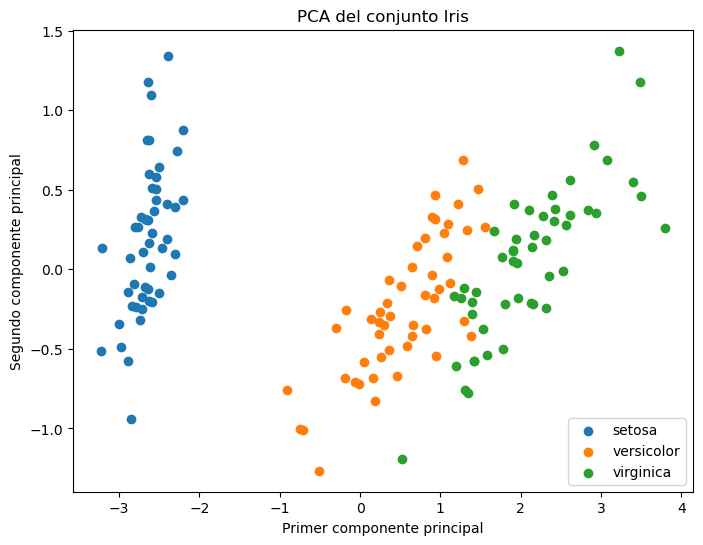

In [9]:
plt.figure(figsize=(8, 6))
for i in range(0, 3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=especies[i])
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.legend()
plt.title('PCA del conjunto Iris');

Entonces básicamente aquí tenemos un gráfico que ubica a cada una de nuestras flores según una **integración de todos los aspectos de medición que disponemos**, y no solamente en función de dos características puntuales.

Si aún te estás preguntando qué son estos dos ejes `x` e `y`, que se llaman **Primer** y **Segundo Componente Principal***, recuerda que lo hemos definido así en el argumento `n_components=2` de **PCA**.

+ El **Primer Componente Principal** te da la primera regla y te dice: "Si acomodas las fotos de las flores siguiendo esta regla, verás la mayor diferencia entre ellas". Es como encontrar la línea donde, si las alinearas, verías que las flores se separan más unas de otras.
+ El **Segundo Componente Principal** te da otra regla, pero esta vez es como decir: "Después de usar la primera regla, esta es la segunda mejor manera de ver más diferencias entre las flores". Esta regla es completamente nueva y diferente a la primera, dándote otro ángulo para ver las variaciones entre las flores.

Cuando finalmente acomodas las fotos en la pared usando estas **dos reglas**, puedes dar un paso atrás y verás que las flores similares tienden a agruparse juntas. Eso es lo que hace el gráfico de dispersión final: muestra tus fotos de flores acomodadas en la pared virtualmente, donde **cada punto es una foto**, y los colores representan los diferentes tipos de flores de Iris.

Los ejes, que son las direcciones dadas por PCA, te ayudan a ver cómo se agrupan las flores según las diferencias más significativas que el método encontró.

Entonces el resultado es una visualización *2D* de un conjunto de datos que originalmente era en *4D*, donde la mayor varianza se muestra a lo largo de los ejes de las componentes principales.

En conclusión, podemos decir que al usar **PCA** hemos aplicado un modelo de **Aprendizaje No Supervisado**, ya que hemos trabajado con datos que **no tienen etiquetas o respuestas predeterminadas**. Nuestro modelo ha descubierto patrones, agrupaciones, asociaciones, o estructuras que están subyacentes en los datos sin que le hayamos dicho de antemano cómo categorizar esos datos. 

En este ejemplo, el modelo PCA ha *aprendido*, sin supervisión, cómo reducir la dimensionalidad (identificando las dos direcciones principales) y cómo identificar patrones, al mapear los datos según estas nuevas dimensiones.

Lo que ha *aprendido* el modelo, por lo tanto, no es un conjunto de categorías o etiquetas predefinidas, sino una nueva representación de los datos que resalta su estructura inherente. Ha descubierto, de forma no supervisada, la manera más informativa de representar los datos, reduciendo su dimensionalidad, lo que podría facilitarnos tareas posteriores como la clasificación, incluso si ese no era el objetivo inicial.

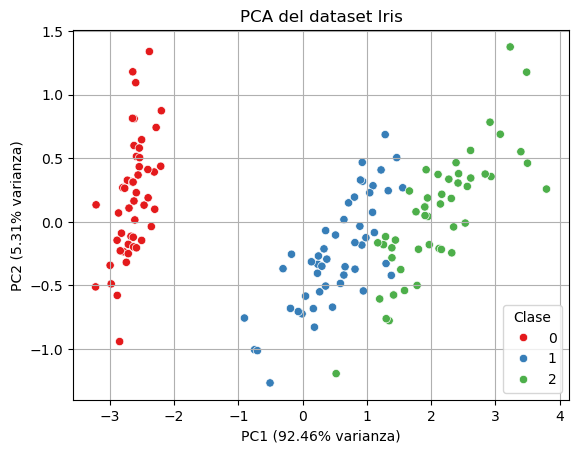

In [22]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Clase'] = y

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Clase', palette='Set1')
plt.title("PCA del dataset Iris")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)")
plt.grid()
plt.show()

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
idx = y==0

In [29]:
idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,